In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## TRAIN DATA 분석
### 12개의 attribute
* numeric data : PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare
* object data : Name, Sex, Ticket, Cabin, Embarked
* Null값이 존재하는 data : Age, Cabin, Embarked(적음), Fare(test data에만)

In [20]:
train.info()
# Survived : 생존 여부 (label로 활용)
# train : (891, 12)
# test : (418, 11) // train에서 survive 행이 없음
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Family       891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenge

In [4]:
# data 숫자형 특성 요약정보
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Cacic, Mr. Luka",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


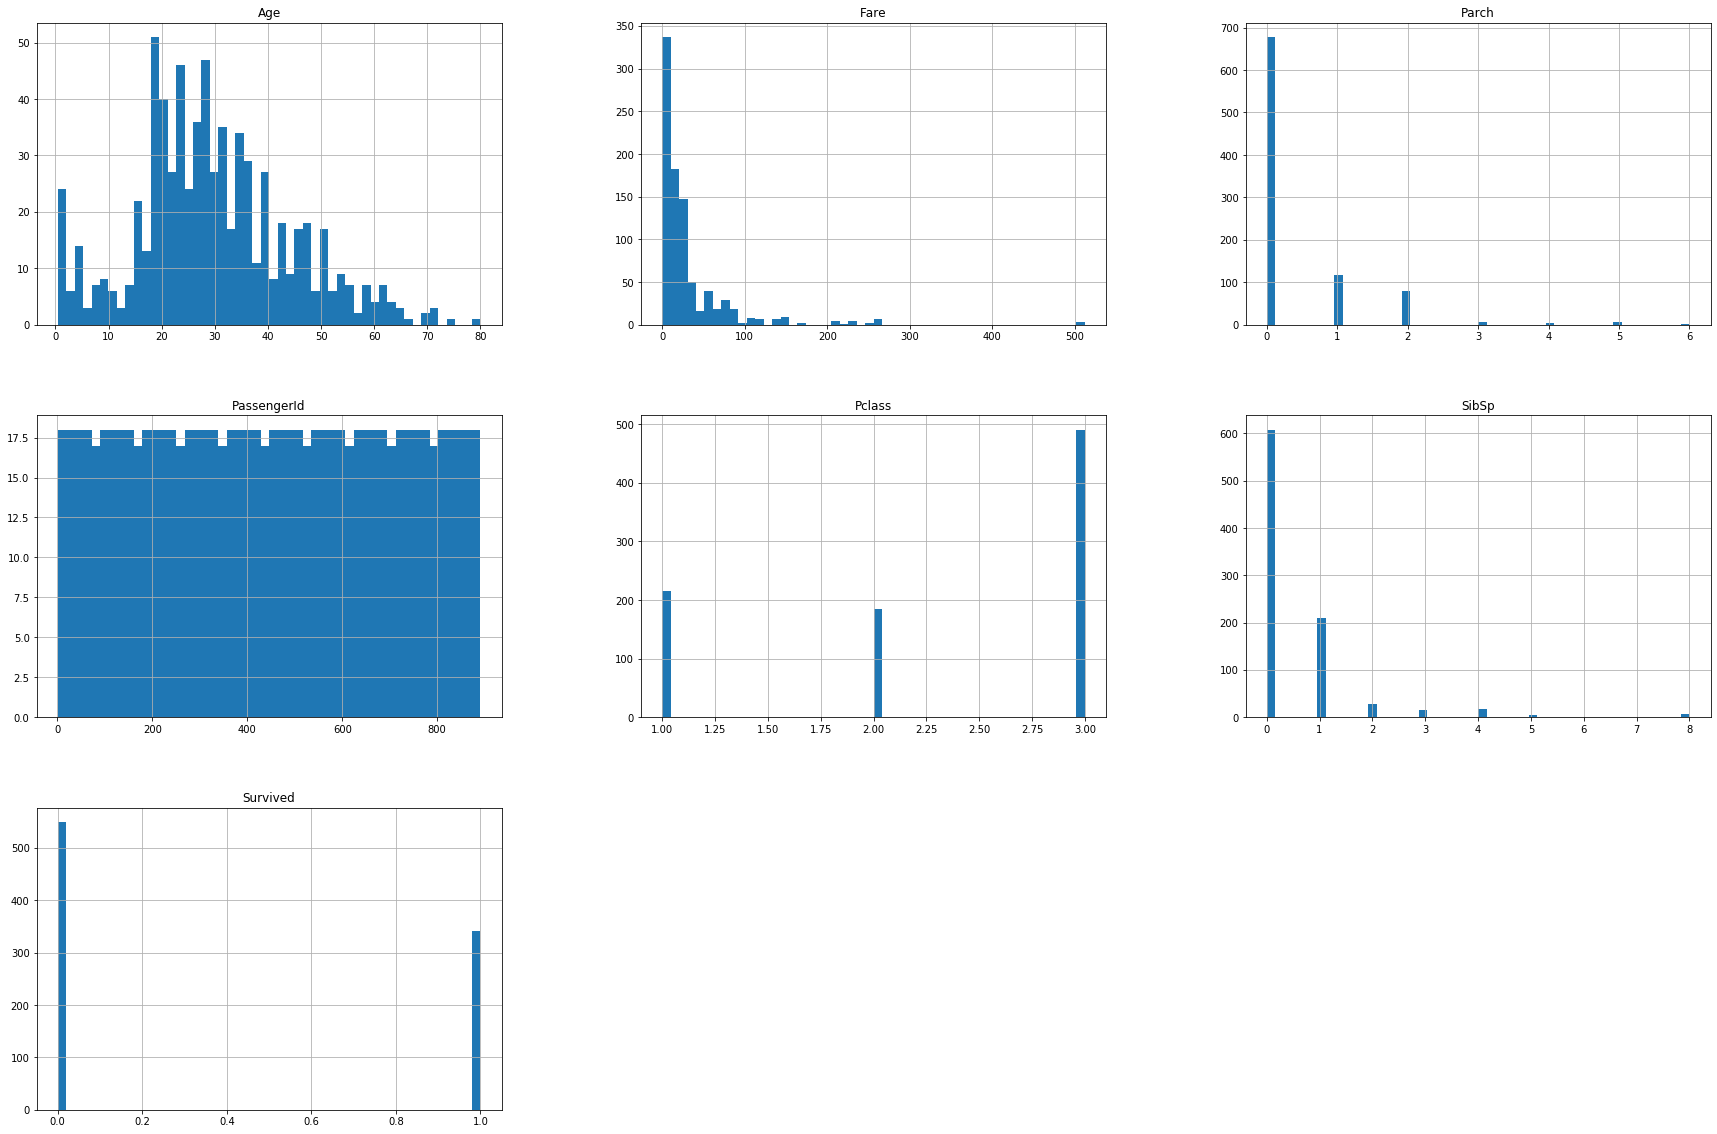

In [6]:
# Histogram 그려보기
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(30, 20))
plt.show()

## Train data 분석 결과
1. 대부분의 승객(>75%)은 부모 또는 자식과 함께 타지 않음.
2. 30%의 승객은 형제자매나 배우자와 함께 탑승
3. 나이가 많은 승객(65-80)의 수는 1% 미만
4. Name은 모두 다름 (count=unique)
5. Ticket은 중복이 적음
6. 성별(Sex)은 577/891이 남자로 약 65%를 차지
7. Cabin은 양도 적고 중복도 많음 ==> 일부 손님들이 호실 공유
8. 3등석 탑승 인원이 가장 많음
9. 대부분의 탑승 인원이 100달러 이하의 요금을 지불 ($512 이상의 요금을 지불한 사람은 없음)

## Survive와의 상관관계 파악

In [7]:
# 생존여부와 Numeric data 상관관계 파악
corr_matrix=train.corr()

corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

`Pclass`와 `Fare`이 비교적 높은 상관관계를 보임 <br>
`Passenger Id`는 생존 여부와 거의 관계가 없음

In [8]:
# Pclass

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# 1등급 탑승 인원 과반수 이상 생존

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
# Sex

train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# 남성에 비해 여성이 더 많이 생존

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
# Family

train["Family"] = train["SibSp"]+train["Parch"]

train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train[["Family", "Survived"]].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# 'SibSp'와 'Parch'의 특성을 결합해 분석 
# 함께 탑승한 가족이 7명 이상인경우 생존률 0
# 함께 탑승한 가족이 1~3명인 경우 생존률이 과반수를 넘음

,Family,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [11]:
# Embarked

train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# C 항구에서 탑승한 경우가 가장 많이 생존

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


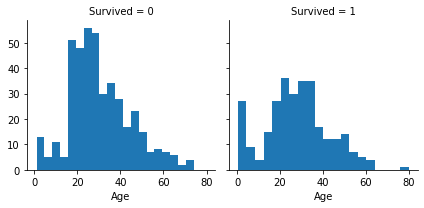

In [15]:
# Age

g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)
# 5세 이하의 아이들의 생존비율이 높음.
# 20 ~ 40세의 탑승자가 가장 많지만 생존률을 높지 않음

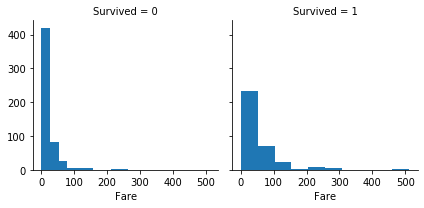

In [19]:
# Fare

g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Fare', bins=10)
# 높은 요금을 낸 승객의 생존률이 높음

## 특성 끼리의 상관관계 파악 (with. Survive)

C:\Users\User\Anaconda3\envs\kaggle\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\User\Anaconda3\envs\kaggle\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\User\Anaconda3\envs\kaggle\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


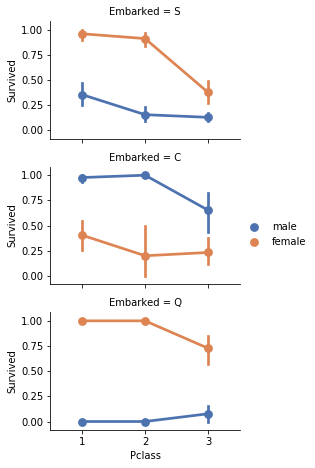

In [17]:
# Embarked & Pclass & Sex & Survived

grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

# 대체로 여성이 높은 비율로 생존했으나 "Embarked = C"인 경우 남성이 더 많이 생존
# Embarked는 feature로 사용 가능